# TP2 SDTSIA204 : Linear Regression
## Aurore GOSMANT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from scipy.stats import norm

In [2]:
data =pd.read_csv("datadm3.csv", header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,-0.270323,-0.437638,0.347423,-0.123436,0.344168,-0.777434,-1.380455,0.491346,0.713854,-0.693186,...,-0.051364,-0.371945,-0.114830,0.153832,-0.973347,-0.997793,0.158006,-0.139519,1.010518,178.0
438,0.872196,0.975497,0.819331,-0.975557,-0.968388,1.029983,-0.079420,-0.130714,0.201144,-2.390860,...,-0.327924,0.350886,-0.305686,-1.292688,0.124676,1.465920,0.663206,1.278693,0.419890,104.0
439,-0.032586,-0.571893,0.806842,0.562865,1.194239,-0.345469,0.717316,0.234458,1.546961,0.554013,...,-1.467585,0.584516,-0.281854,-0.618165,0.840381,1.261452,-0.084541,0.301755,0.517624,132.0
440,-1.529754,0.756967,2.251588,-0.052600,0.502047,0.046229,-1.571494,0.238793,-1.211869,-0.896148,...,-0.000023,-2.231379,-0.880398,0.267481,1.036171,-0.962587,0.491072,-1.389069,0.473725,220.0


There are 210 explanatory variables since the last column is the output Y. Moreover, since there are 442 rows, we deduce that there are 442 observations.

### Question 2

### Normalized and centered explanatory variables

In [3]:
n = 442  
p = 211 

#create a new table with only the exploratory variables
exp_variables = data[data.columns[0:(p-1)]]

means = []
vars = []

for k in exp_variables : 
    means.append(exp_variables[k].mean())
    vars.append(exp_variables[k].var())

    
results = {'Mean of Xk':[k for k in means], 'Variance of Xk':[var for var in vars]}
data_frame = pd.DataFrame(data = results)
data_frame


,Mean of Xk,Variance of Xk
0,7.535450e-19,1.002268
1,-1.507090e-17,1.002268
2,5.494599e-20,1.002268
3,-7.284269e-18,1.002268
4,8.288995e-18,1.002268
...,...,...
205,5.525997e-18,1.002268
206,3.265362e-17,1.002268
207,1.507090e-17,1.002268
208,-4.034606e-18,1.002268


Since the mean of the explanatory variables is almost null, and their standard deviation is equal to 1, we can come to the conclusion that the explanatory variables are either centered and normalized.

### Output variable Y

In [64]:
meanY = data[data.columns[-1]].mean()
varY = data[data.columns[-1]].var()

res = {'Mean of Y':[meanY], 'Variance of Y':[varY]}
data_frame = pd.DataFrame(data = res)
data_frame

,Mean of Y,Variance of Y
0,152.133484,5943.331348


According to the following results, the output variable is not centered nor normalized.

### Plot of four random explanatory variables and the output variable

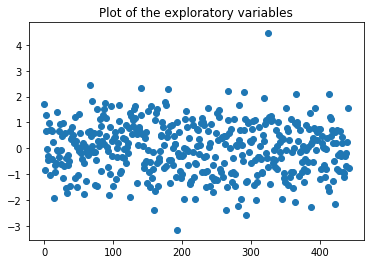

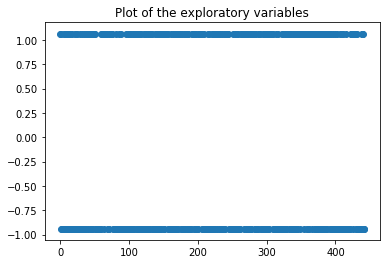

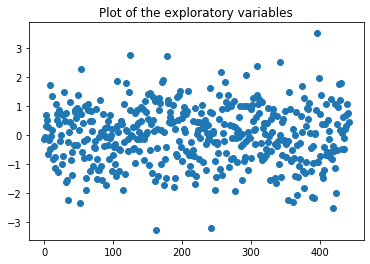

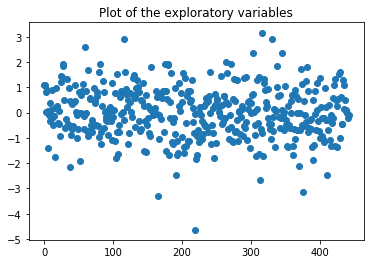

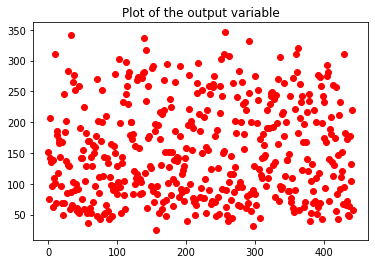

In [65]:
#Choose 4 exploratory variables at random
rand = []
for k in range(4):
    rand.append(random.randint(0, p-1))
    
x_axes = np.linspace(0,442, 442)

for k in range(4):
    #choose the explanatory variables at random
    X = data[data.columns[rand[k]]]
    plt.scatter(x_axes, X)
    plt.title("Plot of the exploratory variables")
    plt.show()

plt.scatter(x_axes,data[data.columns[210]], color = 'red')
plt.title("Plot of the output variable")
plt.show()


We clearly see that the explanatory variables are centered around 0, contrary to the output variable, whose mean varies a lot.

### Question 3 : Train and test

In [66]:
#select only the last column of the data set
outputY = data[data.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(exp_variables, outputY, test_size=0.2)

print("The size of X_train is: ", X_train.shape)
print("The size of X_test is: ", X_test.shape)

The size of X_train is:  (353, 210)
The size of X_test is:  (89, 210)


### Question 4 : Covariance matrix

In [67]:
cov_array = np.cov(X_train.T)

eig_vectors, eig_val_sorted, v = np.linalg.svd(cov_array)

res1 = {'Eigen values':[val for val in eig_val_sorted]}
data_frame = pd.DataFrame(data = res1)
data_frame

,Eigen values
0,5.746375e+00
1,5.312958e+00
2,5.144251e+00
3,5.052856e+00
4,5.025892e+00
...,...
205,1.235766e-16
206,1.183315e-16
207,8.562321e-17
208,4.113360e-17


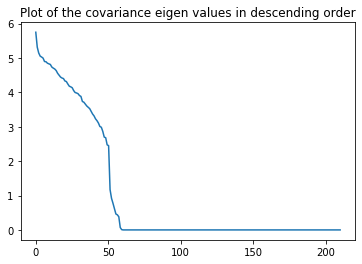

There are only 59 eigen values that are greater than 0.01.


In [68]:
x_axes = np.linspace(0, 210, 210)
plt.title("Plot of the covariance eigen values in descending order")
plt.plot(x_axes, eig_val_sorted)
plt.show()

count = 0
for eig_value in eig_val_sorted : 
    if (eig_value > 0.01):
        count +=1
        
print("There are only",count,
      "eigen values that are greater than 0.01.")
        

### PCA variables

It makes sens to keep only first PCA variables because after about the 60th value, the PCA variables are nearly null, thus, not usefull for our study.

### Question 5 : PCA before OLS

In [69]:
k = 60
#select only the first 60 greatest eigen values
U = eig_vectors[:,:k]

X_train_pca = X_train @ U
#adding an intercept
X_intercept = np.hstack((X_train_pca, np.ones(353).reshape(-1,1)))

theta_n = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ y_train

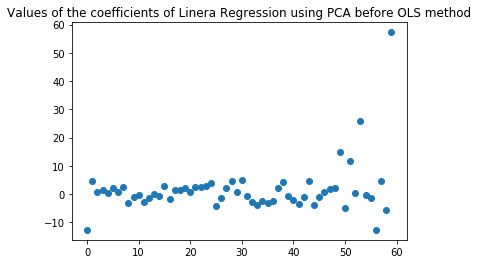

In [70]:
#Run linear regression on the set computed with PCA before OLS
OLS_PCA = LinearRegression().fit(X_train_pca, y_train)

plt.plot(OLS_PCA.coef_, 'o')
plt.title('Values of the coefficients of Linera Regression using PCA before OLS method')

plt.show()

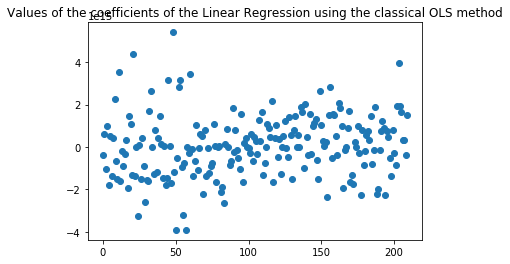

In [71]:
#compute the classical linear regression on the train set
OLS = LinearRegression().fit(X_train, y_train)

plt.plot(OLS.coef_, 'o')
plt.title('Values of the coefficients of the Linear Regression using the classical OLS method')

plt.show()

### Question 6 

### Intercept values for two regression methods 

In [72]:
intercept_PCA = OLS_PCA.intercept_
print("Intercept of Linear Regression using PCA before OLS : ", intercept_PCA)
print()
intercept = OLS.intercept_
print("Intercept of Linear Regression classical OLS : ",intercept)

Intercept of Linear Regression using PCA before OLS :  151.36159528987577

Intercept of Linear Regression classical OLS :  152.00770184135976


### Mean value of the output variable

In [73]:
print("Mean Value of Y : ",np.mean(y_train))

Mean Value of Y :  151.28895184135976


The intercepts are different. Both of them aren't equal to the mean. Thus, we can conclude that both of the training sets aren't normalized, nor centered.

### Normalization of values

In [74]:
normalized_x_train_pca = (X_train_pca - np.mean(X_train_pca))/(np.std(X_train_pca))

normalized_reg  = LinearRegression().fit(normalized_x_train_pca, y_train)

print("Mean Value of Y : ",np.mean(y_train))
print()
print("The value of the Normalized Linear Regression intercept : ",normalized_reg.intercept_)

Mean Value of Y :  151.28895184135976

The value of the Normalized Linear Regression intercept :  151.28895184135976


As expected, the mean value of output Y is equal to the intercept of the normalized train set of explanatory variables.

### Question 7 : Plotting the predictions

According to the lesson, the prediction risk is : 

$ R_{pred} (\hat{\theta_{n}}, \theta*) = \frac{\mathbb{E}[\left\|Y* - \hat{Y}\right\|^{2}]}{n} $ 
  

### Plot with PCA before OLS

The determination coefficient with PCA before OLS is :  0.35031575470898346
The prediction risk with PCA before OLS is :  3762.520200110417


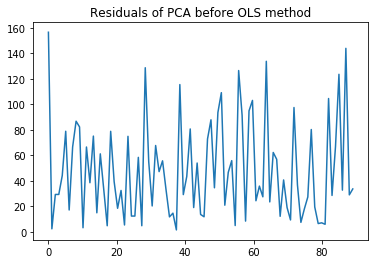

In [75]:
pred_PCA = OLS_PCA.predict(X_test@U)
residuals_PCA = np.abs(pred_PCA - y_test)

n = len(y_test)
x_axes = np.linspace(0, n, n)

R2_PCA = OLS_PCA.score(X_test@U, y_test)
print("The determination coefficient with PCA before OLS is : ", R2_PCA)

pred_risk_PCA = (residuals_PCA @ residuals_PCA.T)/n
print("The prediction risk with PCA before OLS is : ", pred_risk_PCA)

plt.plot(x_axes, residuals_PCA)
plt.title("Residuals of PCA before OLS method")
plt.show()

### Plot with classical OLS

The determination coefficient with classical OLS is :  0.30145742345471194

The prediction risk with classical OLS is :  4045.4737419583325


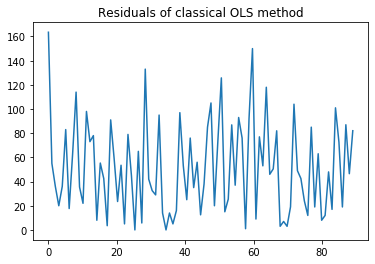

In [76]:
pred_OLS = OLS.predict(X_test)
residuals_OLS = np.abs(pred_OLS - y_test)

R2_OLS = OLS.score(X_test, y_test)
print("The determination coefficient with classical OLS is : ", R2_OLS)
print()
pred_risk_OLS = (residuals_OLS @ residuals_OLS.T)/n
print("The prediction risk with classical OLS is : ", pred_risk_OLS)

plt.plot(x_axes, residuals_OLS)
plt.title("Residuals of classical OLS method")
plt.show()

### Density

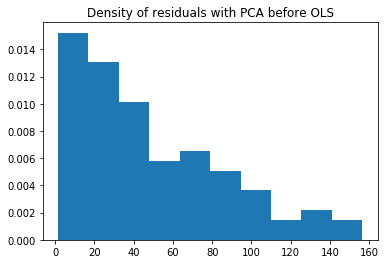

In [77]:
plt.hist(residuals_PCA, density=True)
plt.title("Density of residuals with PCA before OLS")
plt.show()

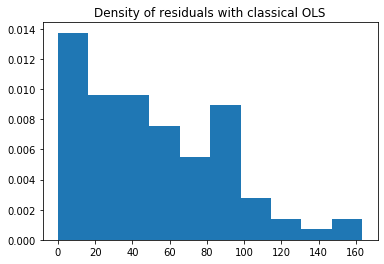

In [78]:
plt.hist(residuals_OLS, density=True)
plt.title("Density of residuals with classical OLS")
plt.show()

Using PCA before OLS has improved the results :  the determinant coefficient $R^{2}$ is closer to 1 with the PCA before OLS method, and its risk is reduced, which means the linear regression is better determined when the PCA before OLS method is applied.

### Question 8 : Forward Variable Selection

In [79]:
n = X_train.shape[0]
p = X_train.shape[1]

#add a column for the intercept
ones = np.ones((n,1))
X_train_ones = np.column_stack((ones, X_train))

r = y_train
S = [] #variables added
A = [k for k in range(p)] #variables to add

#list of indices mirroring the addition order of the variables
order_addition = []

#initialization of p-values and tests : each line represents a step, and column a p-value/test of a exploratoy variable
T_n = np.zeros((p,p))
p_values = np.zeros((p,p))

# no intercept is used for this regression : the data set is centered
reg = LinearRegression(fit_intercept = False)

for k in range(p): #compute the algorithm p times : no use of the stop criterion, thus goes through each exploratory variable
    residuals = np.zeros((n,p))
    for var in A:
        reg.fit(X_train_ones[:,[var]],r) #Linear regression of Yi 
        
        # Evaluates the residuals between Y and Yi, le linear regression of Y
        residuals[:,var] = r - reg.predict(X_train_ones[:,[var]])
        
        # Works out sigma2
        sigma_x_snk_2 = np.sum(residuals[:,var]**2)/(n-1)*n/np.sum(X_train_ones[:,var]**2)
        
        # Compute the test and the p-value (cf. course) associated to each variable at step k
        T_n[k, var] = (n**0.5) * np.abs(reg.coef_)/np.sqrt(sigma_x_snk_2)
        p_values[k, var] = 2*(1-norm.cdf(T_n[k,var]))
    
    best_var = np.argmax(T_n[k,:]) # selects the variable with the "greatest importance"
    A.remove(best_var) # reduces the set of variables that can be selected
    order_addition.append(best_var)
    r = residuals[:,best_var] 

In [80]:
print("Exploratory variables were selected in this order : ")
print(order_addition)

Exploratory variables were selected in this order : 
[0, 59, 124, 14, 168, 134, 130, 6, 32, 136, 35, 184, 86, 170, 100, 20, 36, 49, 76, 99, 46, 44, 175, 29, 173, 167, 60, 118, 11, 61, 73, 48, 34, 189, 137, 97, 198, 209, 24, 190, 78, 149, 77, 53, 135, 178, 129, 176, 89, 82, 80, 163, 155, 28, 150, 119, 112, 3, 92, 107, 88, 114, 132, 171, 30, 188, 13, 158, 33, 113, 37, 157, 38, 172, 202, 127, 201, 70, 108, 56, 65, 208, 87, 85, 18, 206, 204, 81, 26, 91, 203, 164, 23, 159, 145, 179, 185, 54, 42, 43, 69, 5, 103, 106, 9, 47, 177, 193, 160, 128, 182, 183, 186, 162, 180, 133, 191, 110, 1, 148, 154, 181, 10, 125, 93, 68, 50, 156, 147, 161, 16, 8, 187, 79, 142, 90, 7, 4, 126, 75, 196, 140, 195, 115, 40, 31, 151, 169, 58, 121, 122, 25, 12, 98, 120, 63, 123, 84, 143, 72, 22, 153, 62, 96, 139, 41, 192, 197, 67, 74, 27, 104, 138, 57, 94, 102, 116, 166, 146, 199, 55, 152, 194, 2, 15, 205, 131, 105, 101, 66, 71, 83, 51, 165, 141, 117, 19, 111, 174, 17, 39, 64, 45, 95, 21, 144, 200, 52, 207, 109]


### Question 9 : Stop Criterion 

In [81]:
alpha = 0.1

r = y_train
S = [] #variables added
A = [k for k in range(p)] #variables to add

#list of indices mirroring the addition order of the variables
order_addition = []

#initialization of p-values and tests : each line represents a step, and column a p-value/test of a exploratoy variable
T_n = np.zeros((p,p))
p_values = np.zeros((p,p))

# The intercept is already a 'variable'
reg = LinearRegression(fit_intercept = False)

for k in range(p): #compute the algorithm p times : no use of the stop criterion, thus goes through each exploratory variable
    residuals = np.zeros((n,p))
    for var in A:
        reg.fit(X_train_ones[:,[var]],r) #Linear regression of Yi 
        
        # Evaluates the residuals between Y and Yi, le linear regression of Y
        residuals[:,var] = r - reg.predict(X_train_ones[:,[var]])
        
        # Works out sigma2
        sigma_x_snk_2 = np.sum(residuals[:,var]**2)/(n-1)*n/np.sum(X_train_ones[:,var]**2)
        
         # Compute the test and the p-value (cf. course) associated to each variable at step k
        T_n[k, var] = (n**0.5) * np.abs(reg.coef_)/np.sqrt(sigma_x_snk_2)
        p_values[k, var] = 2*(1-norm.cdf(T_n[k,var]))
        
    
    min_p_value = np.min(p_values[k,:])
    if (min_p_value>=0.1):
        break;
    else : 
        best_var = np.argmax(T_n[k,:]) # selects the variable with the "most importance"
        A.remove(best_var) # reduces the set of variables that can be selected
        order_addition.append(best_var)
        r = residuals[:,best_var] 

In [82]:
print("Exploratory variables were selected in this order : ")
print(order_addition)

Exploratory variables were selected in this order : 
[0, 59, 124, 14, 168, 134, 130, 6, 32, 136, 35, 184, 86, 170, 100, 20, 36, 49, 76, 99, 46, 44, 175, 29, 173, 167, 60, 118, 11, 61, 73, 48, 34, 189, 137, 97, 198, 209, 24, 190, 78, 149, 77, 53, 135, 178, 129, 176, 89, 82, 80, 163, 155, 28, 150, 119, 112, 3, 92, 107, 88, 114, 132, 171, 30, 188, 13, 158, 33, 113, 37, 157, 38, 172, 202, 127, 201, 70, 108, 56, 65, 208, 87, 85, 18, 206, 204, 81, 26, 91, 203, 164, 23, 159, 145, 179, 185, 54, 42, 43, 69, 5, 103, 106, 9, 47, 177, 193, 160, 128, 182, 183, 186, 162, 180, 133, 191, 110, 1, 148, 154, 181, 10, 125, 93, 68, 50, 156, 147, 161, 16, 8, 187, 79, 142, 90, 7, 4, 126, 75, 196, 140, 195, 115, 40, 31, 151, 169, 58, 121, 122, 25, 12, 98, 120, 63, 123, 84, 143, 72, 22, 153, 62, 96, 139, 41, 192, 197, 67, 74, 27, 104, 138, 57, 94, 102, 116, 166, 146, 199, 55, 152, 194, 2, 15, 205, 131, 105, 101, 66, 71, 83, 51, 165, 141, 117, 19, 111, 174, 17, 39, 64, 45, 95, 21, 144, 200, 52, 207, 109]


### Plot for the first 3 tests

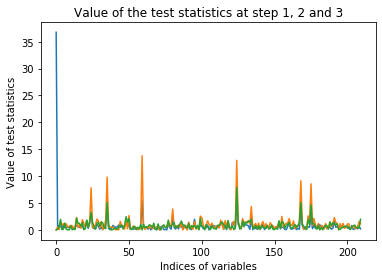

In [83]:
x_axes = np.arange(p)

for j in range(3):
    test_ = T_n[j, :]
    plt.plot(x_axes, test_, label = "step")
    
plt.xlabel("Indices of variables")
plt.ylabel("Value of test statistics")
plt.title("Value of the test statistics at step 1, 2 and 3")
plt.show()


### Graph of the first 50 p-values

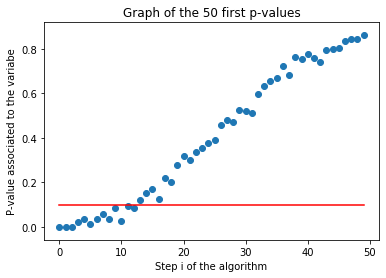

In [84]:
p_values_selection = [] #stocks the p-values in the same order than the variables were added through the algorithm 
step = 0

#selects the first 50 p-values
for var in order_addition : 
    p_values_selection.append(p_values[step, var])
    step = step+1;
    if (step==50):
        break;

x_axes = np.arange(50)
plt.scatter(x_axes, p_values_selection)
plt.plot(x_axes, [0.1 for k in x_axes], color = "red")
plt.xlabel("Step i of the algorithm")
plt.ylabel("P-value associated to the variabe")
plt.title("Graph of the 50 first p-values")
plt.show()

### Stop Criterion when the p-value is larger than $\alpha = 0.1 $

In [85]:
variables_selected = []
step = 0

for var in order_addition :
    if (p_values[step, var]<0.1):
        variables_selected.append(var)
        
print("The variable selection is : ",variables_selected)

#We remove the intercept, that corresponds to the variable with index 0, as needed in the next question
variables_selected.remove(0)
print("The variable selection withouh the intercept is : ", variables_selected)

The variable selection is :  [0, 59, 124, 168, 134, 35, 175, 24, 80, 95, 21]
The variable selection withouh the intercept is :  [59, 124, 168, 134, 35, 175, 24, 80, 95, 21]


### Question 10

### Determination coefficient R²

In [86]:
p = len(variables_selected)

#we create the new table containing only the variable selection
X_selection = X_train[variables_selected]

OLS_selection = LinearRegression().fit(X_selection, y_train)
R2_selection = OLS_selection.score(X_test[variables_selected], y_test)
print("The determination coefficient R² is : ", R2_selection)

The determination coefficient R² is :  0.016858432491068776


### Prediction Risk

In [87]:
y_prediction_selection = OLS_selection.predict(X_test[variables_selected])

Residuals_selection = np.abs(y_prediction_selection - y_test)
pred_risk_selection = Residuals_selection.T @ Residuals_selection / len(y_test)

print("The prediction risk is : ", pred_risk_selection)

The prediction risk is :  5693.673556242109


In [88]:
res2 = {'classical OLS':[R2_OLS, pred_risk_OLS],
        'PCA before OLS' : [R2_PCA, pred_risk_PCA],
        'OLS forward selection' : [R2_selection, pred_risk_selection]
       }
data_frame = pd.DataFrame(data = res2)
data_frame

,classical OLS,PCA before OLS,OLS forward selection
0,0.301457,0.350316,0.016858
1,4045.473742,3762.520200,5693.673556


Actually, the prediction risk and the determination coefficient depend on the split we obtain. However, the forward selection method is quite equivalent to the PCA before OLS method, and is generally better than the classical OLS process.

### Question 11

In [89]:
n = len(X_train)

#creates a shuffled list of integer from 0 to n
liste = np.array(X_train.index)
random.shuffle(liste)


number_folds = 4
print("The train sample is split in", number_folds, "folds : ")
print()

div = n // number_folds

sample = []
for j in range(number_folds):
    if (j==3):
        l = liste[j*div:]
        sample.append(l)
        print("The size of sample ",j+1, "is : ", len(l))
    else : 
        l = liste[j*div : (j+1)*div]
        sample.append(l)
        print("The size of sample ",j+1, "is : ", len(l))
        
X = []
Y = []
#creates the 4 folds respectively of X_train and y_train
for k in range(number_folds):
    X.append(X_train.loc[sample[k]])
    Y.append(y_train[sample[k]])

The train sample is split in 4 folds : 

The size of sample  1 is :  88
The size of sample  2 is :  88
The size of sample  3 is :  88
The size of sample  4 is :  89


### Question 12 : Ridge Regression Method and Cross validation

In [90]:
#regularization parameter takes the values from 10e-5 to 10e4
reg_param = [10**j for j in range(-5,4)]

#creates a list of risks associated to each value of the regularization parameter
risk= np.zeros(len(reg_param))


for k in range(number_folds):
    tmp= [j for j in range(number_folds)]
    tmp.remove(k) #creates the list of folds that are different from k
    
    X_k = X[k] #fold in order to test the model
    Y_k = Y[k]

    X_model = pd.concat(X[i] for i in tmp) #concatenates the 3 folds left in order to compute the model for X and Y
    Y_model = pd.concat(Y[i] for i in tmp) 
    
    for i in range(len(reg_param)):
        reg = Ridge(reg_param[i]).fit(X_model, Y_model) #linear regression using Ridge method
        y_predict = reg.predict(X_k)
        n = len(y_predict)
        risk [i] += np.sum((y_predict - Y_k)**2) /(n * number_folds) #computes the mean of the risk
        

### Plot estimated risk curve

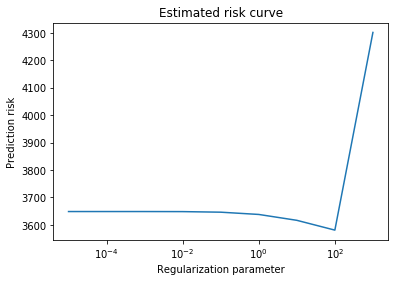

In [91]:
plt.plot(reg_param, risk)
plt.xscale("log")
plt.xlabel("Regularization parameter")
plt.ylabel("Prediction risk")
plt.title("Estimated risk curve")
plt.show()

### Optimal regularization parameter

In [92]:
#Find the minimum risk, associated to the optimal regularization parameter
min_risk = np.min(risk)

index_optim = None
for index in range(len(risk)):
    if (risk[index] == min_risk):
        index_optim = index

reg_param_optim = reg_param[index_optim]

print("The optimal regularization parameter is: ", reg_param_optim)
print("The corresponding minimum risk value is: ", min_risk)

The optimal regularization parameter is:  100
The corresponding minimum risk value is:  3581.0059922719493


### Question 13 : Lasso Regularization Parameter

In [96]:
reg_param_lasso = [] #Compute the mean of the regularization parameters chosen by the lasso method

for k in range(number_folds):
    tmp= [j for j in range(number_folds)]
    tmp.remove(k)
    X_k = X[k]
    Y_k = Y[k]

    X_model = pd.concat(X[i] for i in tmp)
    Y_model = pd.concat(Y[i] for i in tmp)

    lasso_reg = LassoCV().fit(X_model, Y_model) #computes the model using Lasso method
    reg_param_lasso.append(lasso_reg.alpha_)

In [97]:
print("Regularization parameters chose using the lasso method : ")
res3 = {'1rst split': [reg_param_lasso[0]],
        '2nd split' : [reg_param_lasso[1]],
        '3rd split' : [reg_param_lasso[2]],
        '4th split' : [reg_param_lasso[3]]
       }
data_frame = pd.DataFrame(data = res3)
data_frame

Regularization parameters chose using the lasso method : 


,1rst split,2nd split,3rd split,4th split
0,4.496771,5.103254,7.829319,4.731065


In [98]:
print("The mean of the regularization parameters chose with the lasso method is : ", np.mean(reg_param_lasso))

The mean of the regularization parameters chose with the lasso method is :  5.540102102672902


### Associate Prediction Risk

In [99]:
y_pred_lasso = lasso_reg.predict(X_test)
risk_lasso = np.sum((y_pred_lasso - y_test)**2) /(len(y_pred_lasso))
print("The associate prediction risk is : ", risk_lasso)

The associate prediction risk is :  3229.6144307692357


### Question 14

### Variables selected by the Lasso are the one which have the coefficients of the parameter vector $\theta$ non null.

In [100]:
coeff_lasso = lasso_reg.coef_ #estimated coefficients for the linear regression using Lasso

selected_variables_lasso = []
for k in range(len(coeff_lasso)):
    if (coeff_lasso[k] !=0): #variables selected by Lasso are the non null ones
        selected_variables_lasso.append(k)
        
print("The variables selected are : ", selected_variables_lasso)
print("The number of variables selected by the Lasso method is : ", len(selected_variables_lasso))
    

The variables selected are :  [5, 8, 13, 15, 58, 98, 117, 123, 131, 135, 141, 167, 172, 174, 208, 209]
The number of variables selected by the Lasso method is :  16


In [102]:
p = len(selected_variables_lasso)
N = len(coeff_lasso)

selected_variables_lasso = [i for i in range(N) if (coeff_lasso[i] != 0)]

#creation of a new tables containing only the variables selected by Lasso
X_selection_lasso = X_train[selected_variables_lasso]


OLS_lasso = LinearRegression().fit(X_selection_lasso, y_train) #linear regression on the selection variables


### Associate risk and Determination Coefficient R²

In [105]:
y_pred_lasso_OLS = OLS_lasso.predict(X_test[selected_variables_lasso])
risk_lasso_OLS = np.sum((y_pred_lasso_OLS - y_test)**2) /(len(y_pred_lasso_OLS))
print("Prediction risk for Lasso : ", risk_lasso_OLS)

print("Determination coefficient R² for Lasso : ", 
      OLS_lasso.score(X_test[selected_variables_lasso], y_test))

Prediction risk for Lasso :  3555.731504830189
Determination coefficient R² for Lasso :  0.3860225018578509


### Question 15